In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [101]:
def add_metadata(metadata, features):
    names = [x.split("-") for x in features['sound.files']]
    ids = [int(x[2].replace(".wav",'')) for x in names]
    ordered_metadata = pd.DataFrame()
    for i in ids:
        df = metadata[metadata.Recording_ID == i]
        ordered_metadata = ordered_metadata.append(df,ignore_index=True)
    return ordered_metadata.join(features)

In [102]:
features1 = pd.read_csv('/home/dan/Bird/Analysis/feature_vector.csv',header = None,names=["sound.files","selec","duration","meanfreq","sd","freq.median","freq.Q25","freq.Q75","freq.IQR","time.median","time.Q25","time.Q75","time.IQR","skew","kurt","sp.ent","time.ent","entropy","sfm","meandom","mindom","maxdom","dfrange","modindx","startdom","enddom","dfslope","meanpeakf"
])
metadata1 = pd.read_csv('/home/dan/Bird/Analysis/USA_Texas_A.csv', encoding = "ISO-8859-1")

In [99]:
[x for x in features1[]]


['Branta-canadensis-1136.wav',
 'Branta-canadensis-1136.wav',
 'Branta-canadensis-1136.wav',
 'Branta-canadensis-1136.wav',
 'Branta-canadensis-1136.wav',
 'Spatula-clypeata-368726.wav',
 'Spatula-clypeata-368726.wav',
 'Spatula-clypeata-368726.wav',
 'Spatula-clypeata-368726.wav',
 'Spatula-clypeata-368726.wav',
 'Anas-platyrhynchos-357023.wav',
 'Anas-platyrhynchos-357023.wav',
 'Anas-platyrhynchos-357023.wav',
 'Anas-platyrhynchos-357023.wav',
 'Anas-platyrhynchos-357023.wav',
 'Mergus-serrator-134967.wav',
 'Mergus-serrator-134967.wav',
 'Mergus-serrator-134967.wav',
 'Mergus-serrator-134967.wav',
 'Mergus-serrator-134967.wav',
 'Oxyura-jamaicensis-109911.wav',
 'Oxyura-jamaicensis-109911.wav',
 'Oxyura-jamaicensis-109911.wav',
 'Oxyura-jamaicensis-109911.wav',
 'Oxyura-jamaicensis-109911.wav',
 'Ortalis-vetula-147483.wav',
 'Ortalis-vetula-147483.wav',
 'Ortalis-vetula-147483.wav',
 'Ortalis-vetula-147483.wav',
 'Ortalis-vetula-147480.wav',
 'Ortalis-vetula-147480.wav',
 'Ortalis-

In [123]:
good_boi1 = add_metadata(metadata1,features1)

type(good_boi1)

pandas.core.frame.DataFrame

ValueError: scatter requires x column to be numeric

In [104]:
good_boi1.columns


Index(['Recording_ID', 'Genus', 'Specific_epithet', 'Subspecies',
       'English_name', 'Recordist', 'Country', 'Locality', 'Latitude',
       'Longitude', 'Vocalization_type', 'Audio_file', 'License', 'Url',
       'Quality', 'Time', 'Date', 'sound.files', 'selec', 'duration',
       'meanfreq', 'sd', 'freq.median', 'freq.Q25', 'freq.Q75', 'freq.IQR',
       'time.median', 'time.Q25', 'time.Q75', 'time.IQR', 'skew', 'kurt',
       'sp.ent', 'time.ent', 'entropy', 'sfm', 'meandom', 'mindom', 'maxdom',
       'dfrange', 'modindx', 'startdom', 'enddom', 'dfslope', 'meanpeakf'],
      dtype='object')

SyntaxError: invalid syntax (<ipython-input-105-72d7565469ea>, line 1)

In [108]:
X=good_boi1.loc[:,['selec', 'duration',
       'meanfreq', 'sd', 'freq.median', 'freq.Q25', 'freq.Q75', 'freq.IQR',
       'time.median', 'time.Q25', 'time.Q75', 'time.IQR', 'skew', 'kurt',
       'sp.ent', 'time.ent', 'entropy', 'sfm', 'meandom', 'mindom', 'maxdom',
       'dfrange', 'modindx', 'startdom', 'enddom', 'dfslope', 'meanpeakf']]
Y=good_boi1['English_name']

In [109]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y)


In [122]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.23892489677636441

In [112]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.36363636363636365


In [113]:
from sklearn import metrics
predicted = knn.predict(X_test)
metrics.classification_report(y_test, predicted)

/home/dan/miniconda3/envs/hic-param-est/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00         1\n           1       0.00      0.00      0.00         2\n           2       0.00      0.00      0.00         1\n           3       0.23      0.33      0.27         9\n           4       0.00      0.00      0.00         4\n           5       0.31      0.57      0.40        14\n           6       0.50      0.44      0.47         9\n           7       0.35      0.82      0.49        17\n           8       0.00      0.00      0.00         1\n           9       0.00      0.00      0.00         1\n          10       0.75      1.00      0.86         3\n          11       0.00      0.00      0.00         3\n          12       0.00      0.00      0.00         1\n          13       0.50      0.30      0.37        10\n          14       0.00      0.00      0.00         3\n          15       0.00      0.00      0.00         2\n          16       0.00      0.00      0.00         2\n       

In [114]:
metrics.confusion_matrix(y_test, predicted)

array([[ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  3,  0,  2,  1,  3,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  3,  0,  8,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  4,  4,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0, 14,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0

In [115]:
from sklearn.svm import SVC
model = SVC(kernel="linear", C=0.025)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.47474747474747475


In [116]:
from sklearn.svm import SVC
model = SVC(gamma=0.05, C=5)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.31313131313131315


In [117]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=10)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.5555555555555556


In [119]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=10000)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

/home/dan/miniconda3/envs/hic-param-est/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.5151515151515151


In [120]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
model = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.48484848484848486


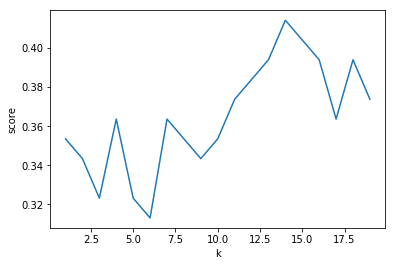

In [121]:
scores = {}

for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores[k] = knn.score(X_test, y_test)

plt.plot(scores.keys(), scores.values())
plt.xlabel('k')
plt.ylabel('score')
plt.show()

In [5]:
species = good_boi1.Genus + good_boi1.Specific_epithet
y = species.astype("category").cat.codes

In [6]:
X = good_boi1.iloc[:,18:]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
model = LogisticRegression(solver='lbfgs', multi_class = 'auto', max_iter=10000)
model.fit(X_train,y_train);
model.score(X_test,y_test)

/home/dan/miniconda3/envs/hic-param-est/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.5975609756097561

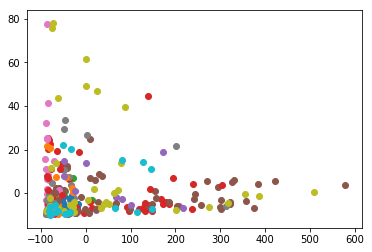

In [7]:
#2d PCA plotting
def _2d_plot(species, X): #len(species) = nrows(X)
    pca = PCA(n_components=2)
    pca.fit(X);
    df = pd.DataFrame()
    df['species'] = species
    everything = X.join(df)
    for i in everything.groupby('species').__iter__():
        tuples = pca.transform(i[1].drop('species',axis=1))
        xs = tuples[:,0]
        ys = tuples[:,1]
        plt.scatter(xs, ys);
    plt.show()

_2d_plot(species,X)

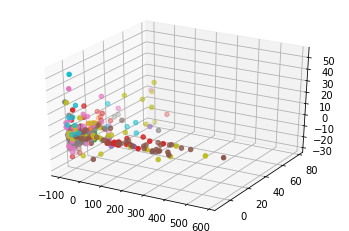

In [8]:
#3d PCA plotting
def _3d_plot(species, X): #len(species) = nrows(X)
    pca = PCA(n_components=3)
    pca.fit(X);
    df = pd.DataFrame()
    df['species'] = species
    everything = X.join(df)
    fig = plt.figure()
    ax = fig.add_subplot(111,projection = '3d')
    for i in everything.groupby('species').__iter__():
        tuples = pca.transform(i[1].drop('species',axis=1))
        xs = tuples[:,0]
        ys = tuples[:,1]
        zs = tuples[:,2]
        ax.scatter(xs, ys, zs);
    plt.show()
        
_3d_plot(species,X)

In [9]:
X1 = good_boi1.iloc[:,35:]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, random_state=1)
model = LogisticRegression(solver='lbfgs', multi_class = 'auto', max_iter=10000)
model.fit(X1_train,y1_train);
model.score(X1_test,y1_test)

0.5365853658536586

In [10]:
good_boi1.columns

Index([     'Recording_ID',             'Genus',  'Specific_epithet',
              'Subspecies',      'English_name',         'Recordist',
                 'Country',          'Locality',          'Latitude',
               'Longitude', 'Vocalization_type',        'Audio_file',
                 'License',               'Url',           'Quality',
                    'Time',              'Date',                   0,
                         1,                   2,                   3,
                         4,                   5,                   6,
                         7,                   8,                   9,
                        10,                  11,                  12,
                        13,                  14,                  15,
                        16,                  17,                  18,
                        19,                  20,                  21,
                        22,                  23,                  24,
                    

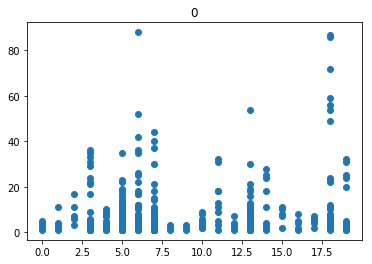

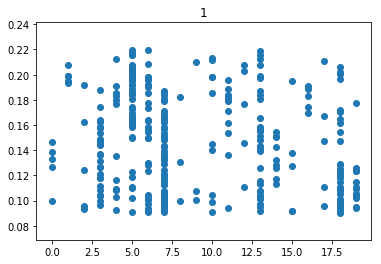

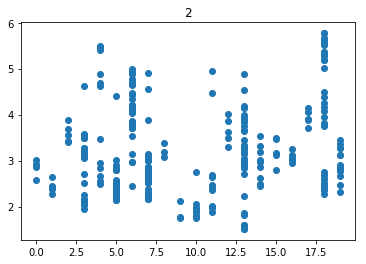

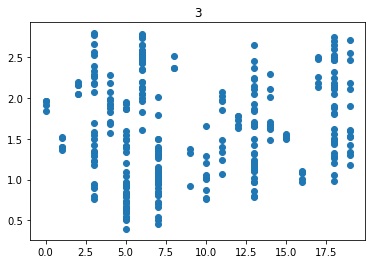

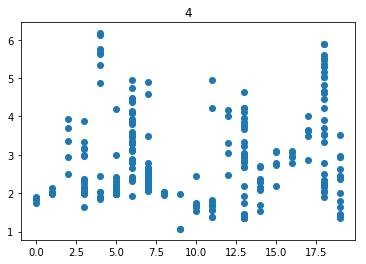

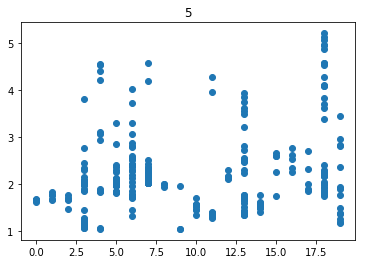

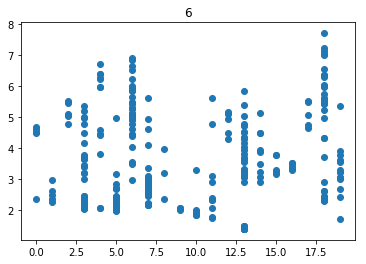

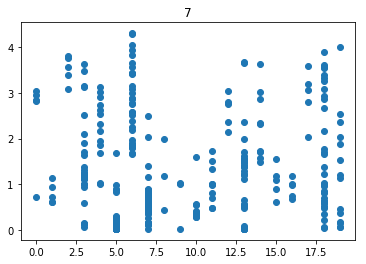

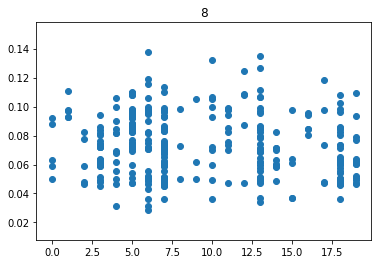

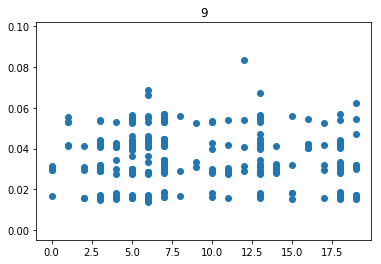

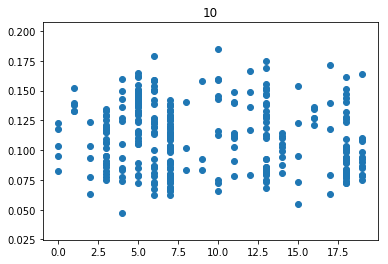

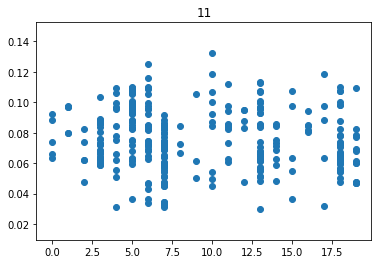

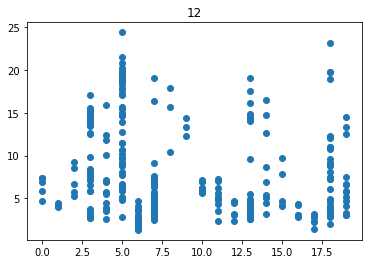

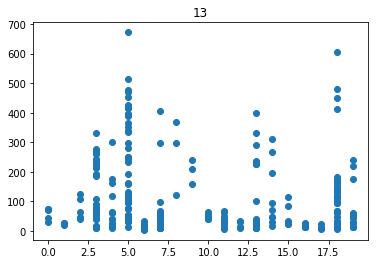

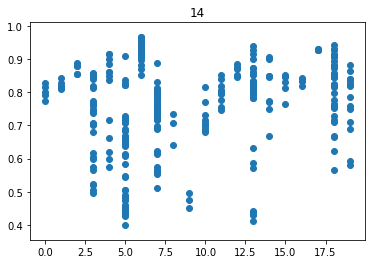

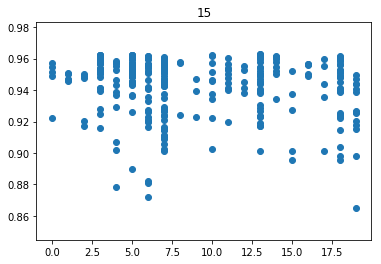

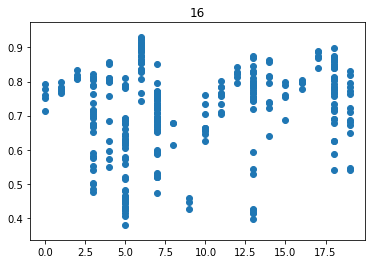

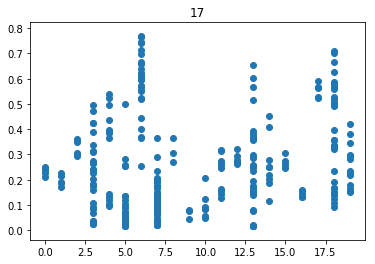

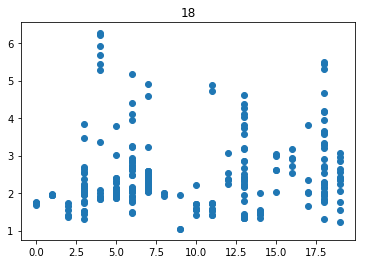

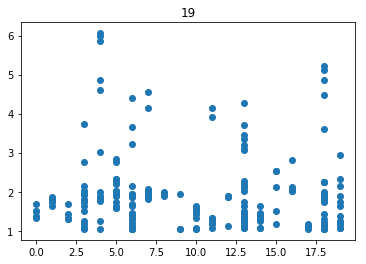

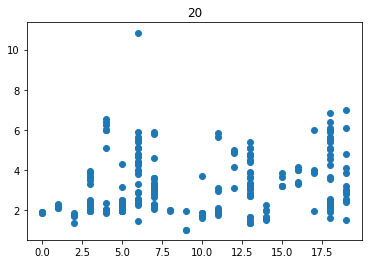

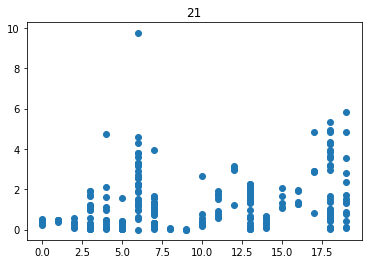

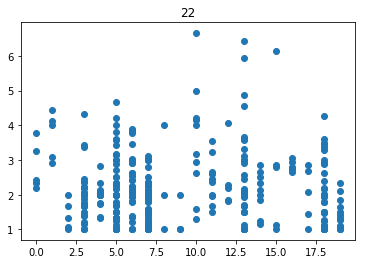

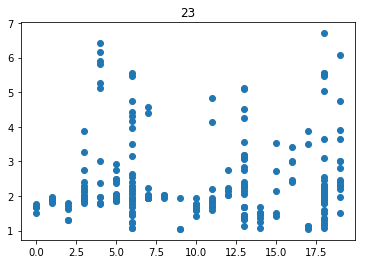

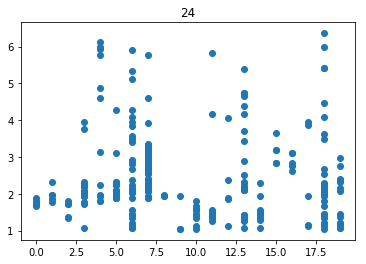

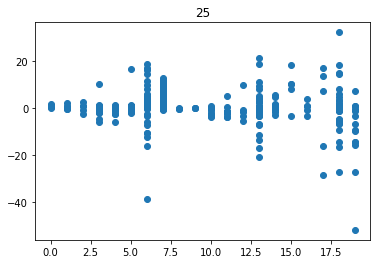

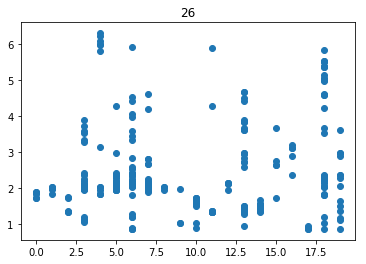

In [11]:
for i in range(0,27):
    plt.scatter(y,X.iloc[:,i])
    plt.title(i)
    plt.show()